In [12]:
import sys
sys.path.append('..')

In [13]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from nt_toolbox.signal import gaussian_blur, imageplot
from nt_toolbox.general import rescale
from plotting_tools import cplot
from numeric_tools import compute_gradient
from active_contours import perform_gradient_descent_standard_curve, perform_gradient_descent_polar_curve

In [14]:
n=200
nbumps = 40
theta = np.random.rand(nbumps,1)*2*np.pi
r = .6*n/2
a = np.array([.62*n,.6*n])
x = np.around( a[0] + r*np.cos(theta) )
y = np.around( a[1] + r*np.sin(theta) )
W = np.zeros([n,n])
for i in np.arange(0,nbumps):
    W[int(x[i]),int(y[i])] = 1
W = gaussian_blur(W,6.0)
W = rescale( -np.minimum(W,.05), .3,1)

<IPython.core.display.Javascript object>


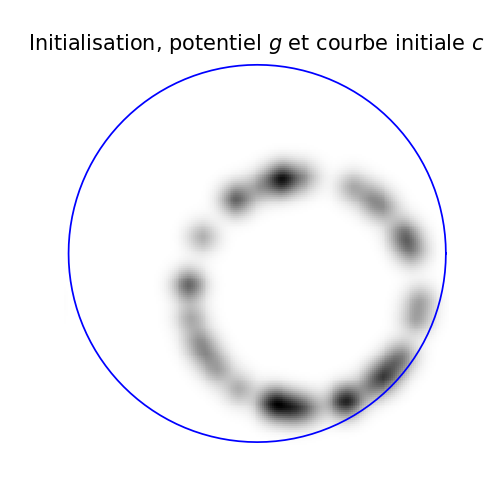

In [15]:
r = 0.98*n/2 # radius
p = 128 # number of points on the curve
theta = np.transpose(np.linspace(0, 2*np.pi, p + 1) )
theta = theta[0:-1]
c_0 = n/2 * (1 + 1j) +  r*(np.cos(theta) + 1j*np.sin(theta))

plt.figure(figsize=(4,4))
plt.title(r"Initialisation, potentiel $g$ et courbe initiale $c$")
imageplot(np.transpose(W))
cplot(c_0)
plt.savefig('results/init.eps')

<IPython.core.display.Javascript object>


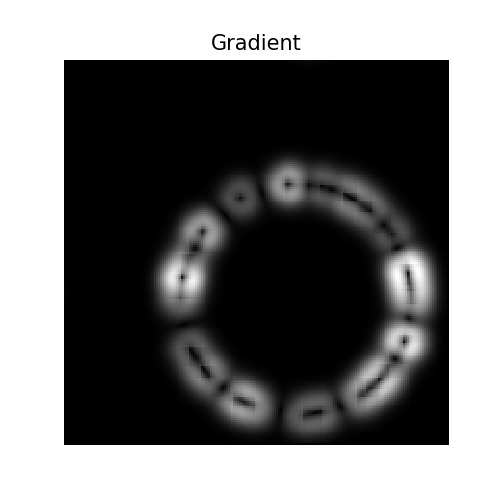

In [16]:
plt.figure(figsize=(4,4))
plt.title('Gradient')
imageplot(np.abs(compute_gradient(W)))

<IPython.core.display.Javascript object>


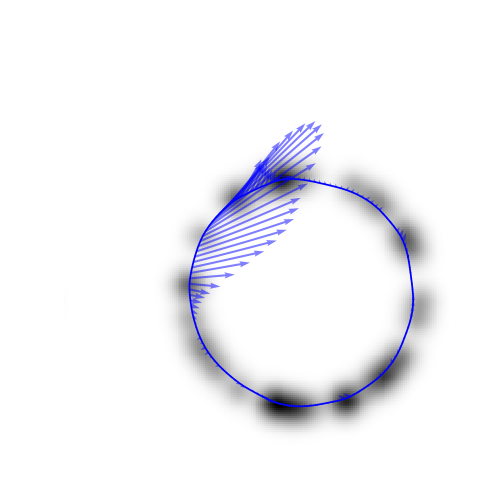

In [17]:
r = 0.98*n/2 # radius
p = 128 # number of points on the curve
theta = np.transpose(np.linspace(0, 2*np.pi, p + 1) )
theta = theta[0:-1]
c_0 = n/2 * (1 + 1j) +  r*(np.cos(theta) + 1j*np.sin(theta))

perform_gradient_descent_standard_curve(W,
                              c_0,
                              dt=1,
                              niter=4000,
                              nb_points_c=128,
                              step_display=1000,
                              region_term=0,
                                 )

<IPython.core.display.Javascript object>


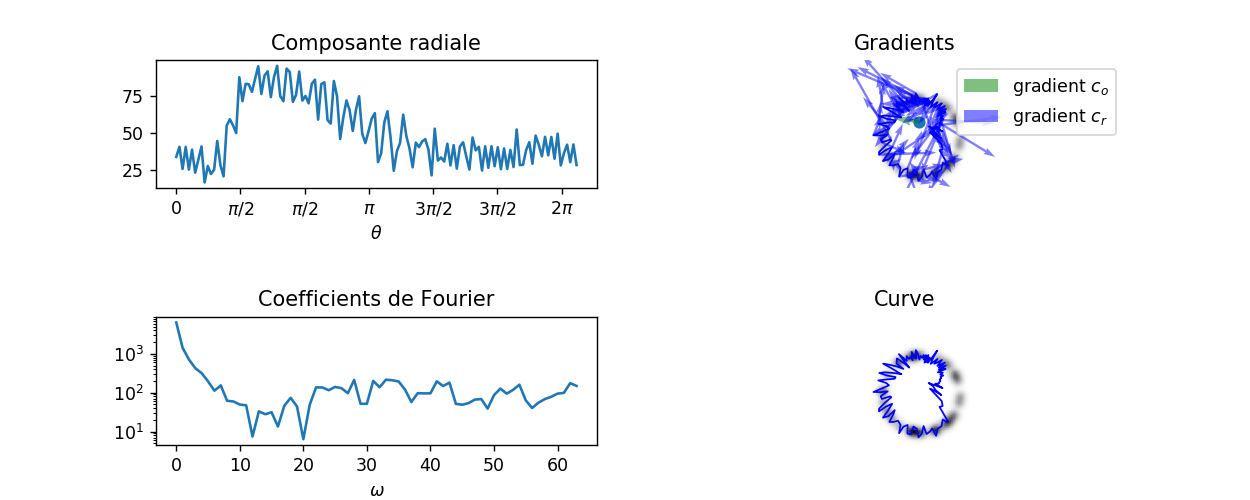

In [20]:
c_0 = n/2 * (1 + 1j)
c_r = [0.9*n/2]*128

c_0, c_r = perform_gradient_descent_polar_curve(W,
                              c_0,
                              c_r,
                              gamma=0.2,
                              alpha=1,
                              lam=0.6,
                              dt=1,
                              niter=6000,
                              nb_points_c=128,
                              step_display=1000,
                              sobolev=False,
                              region_term=0,
                              save='results/fig_sobolev.eps'
                              
                             )


<IPython.core.display.Javascript object>


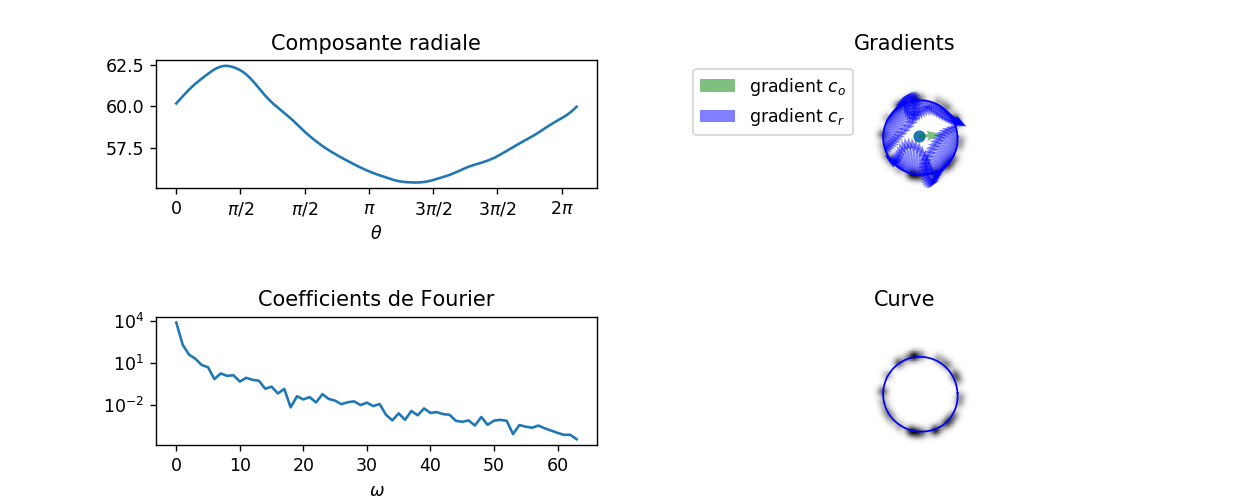

In [19]:
c_0 = n/2 * (1 + 1j)
c_r = [0.9*n/2]*128

c_0, c_r = perform_gradient_descent_polar_curve(W,
                              c_0,
                              c_r,
                              gamma=0.2,
                              alpha=1,
                              lam=0.7,
                              dt=1,
                              niter=10000,
                              nb_points_c=128,
                              step_display=1000,
                              sobolev=True,
                              region_term=0,
                              save='results/fig_sobolev.eps'
                              
                             )
